In [1]:
#!pip install scikit-learn
#!pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import wilcoxon
from scipy import stats
from sklearn.model_selection import train_test_split

<h1>EDA</h1>

In [3]:
df=pd.read_csv('churn.csv')

original_df = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print('Number of rows:',df.shape[0]) 
print('Number of columns:',df.shape[1]) 

Number of rows: 7043
Number of columns: 21


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
print(f"The amount of duplicated numbers are {df.duplicated().sum()}")

The amount of duplicated numbers are 0


In [7]:
df.head(20)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male              0      No         No      16          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   
16  8191-XWSZG  Female              0      No         No      52          Yes   
17  9959-WOFKT    Male              0      No        Yes      71          Yes   
18  4190-MFLUW  Female              0     Yes        Yes      10          Yes   
19  4183-MYFRB  Female              0      No         No      21          Yes   

       MultipleLines InternetService       OnlineSecurity  ...  \
0   No phone service             DSL                   No  ...   
1                 No             DSL                  Yes  ...   
2                 No             DSL                  Yes  ...   
3   No phone service             DSL                  Yes  ...   
4                 No     Fiber optic                   No  ...   
5                Yes     Fiber optic                   No  ...   
6                Yes     Fiber optic                   No  ...   
7   No phone service             DSL                  Yes  ...   
8                Yes     Fiber optic                   No  ...   
9                 No             DSL                  Yes  ...   
10                No             DSL                  Yes  ...   
11                No              No  No internet service  ...   
12               Yes     Fiber optic                   No  ...   
13               Yes     Fiber optic                   No  ...   
14                No     Fiber optic                  Yes  ...   
15               Yes     Fiber optic                  Yes  ...   
16                No              No  No internet service  ...   
17               Yes     Fiber optic                  Yes  ...   
18                No             DSL                   No  ...   
19                No     Fiber optic                   No  ...   

       DeviceProtection          TechSupport          StreamingTV  \
0                    No                   No                   No   
1                   Yes                   No                   No   
2                    No                   No                   No   
3                   Yes                  Yes                   No   
4                    No                   No                   No   
5                   Yes                   No                  Yes   
6                    No                   No                  Yes   
7                    No                   No                   No   
8                   Yes                  Yes                  Yes   
9                    No                   No                   No   
10                   No                   No                   No   
11  No internet service  No internet service  No internet service   
12                

In [8]:
# basic preperations of the data
df = df.rename(columns=str.lower)

# הפכיה לערכים מספריים על מנת להציג את הנתונים
df['totalcharges'] = df['totalcharges'].str.strip() 
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df.isnull().sum()

df = df.dropna(subset=['totalcharges'])

In [9]:
# הצגת השורות הבעייתיות
problem_rows = df[df['totalcharges'].isna()]

problem_rows = problem_rows[['customerid', 'totalcharges']]

print(problem_rows['customerid'].count(),problem_rows)

0 Empty DataFrame
Columns: [customerid, totalcharges]
Index: []


In [10]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [11]:
df_diff = pd.DataFrame()
df_diff['diff'] = df['totalcharges'] - (df['monthlycharges']*df['tenure'])
# if the number is negative we assume the price raised during the tenure
# if the number is 0 there was no change in price during the tenure
# if the number is positive we assume the price dropped during the tenure

df_diff['price_remain'] = (df_diff['diff'] == 0).astype(int)
df_diff['price_raised'] = (df_diff['diff'] < 0).astype(int)
df_diff['price_dropped'] = (df_diff['diff'] > 0).astype(int)
df_diff['churned'] = df['churn']

df2 = df_diff.groupby('churned')['diff'].agg(['mean', 'std'])
df2

mean        std
churned                     
No       0.140858  70.948991
Yes      0.187266  55.812596

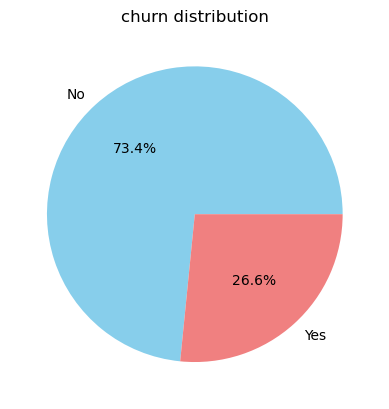

In [12]:
df['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('churn distribution')
plt.ylabel('') 
plt.show()


/var/folders/4_/wc7y9d953kx0rs3vk8lkbcjh0000gq/T/ipykernel_22109/751011585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set2')


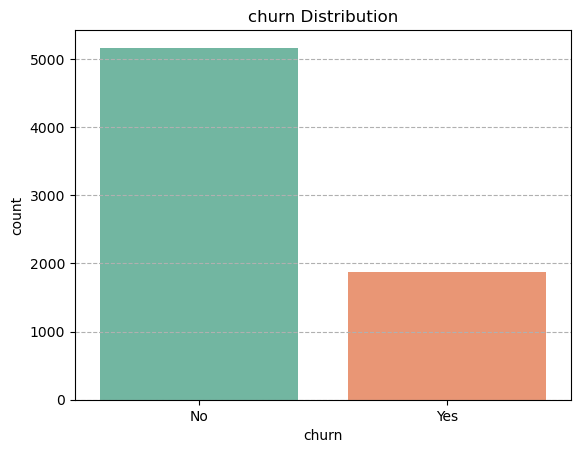

In [13]:
#3. התפלגות משתנה עזיבה  (לפני חלוקה):
sns.countplot(x='churn', data=df, palette='Set2')
plt.title('churn Distribution')
plt.grid(axis='y', linestyle='--')
plt.show()

In [14]:
df[['tenure']].describe()

tenure
count  7032.000000
mean     32.421786
std      24.545260
min       1.000000
25%       9.000000
50%      29.000000
75%      55.000000
max      72.000000

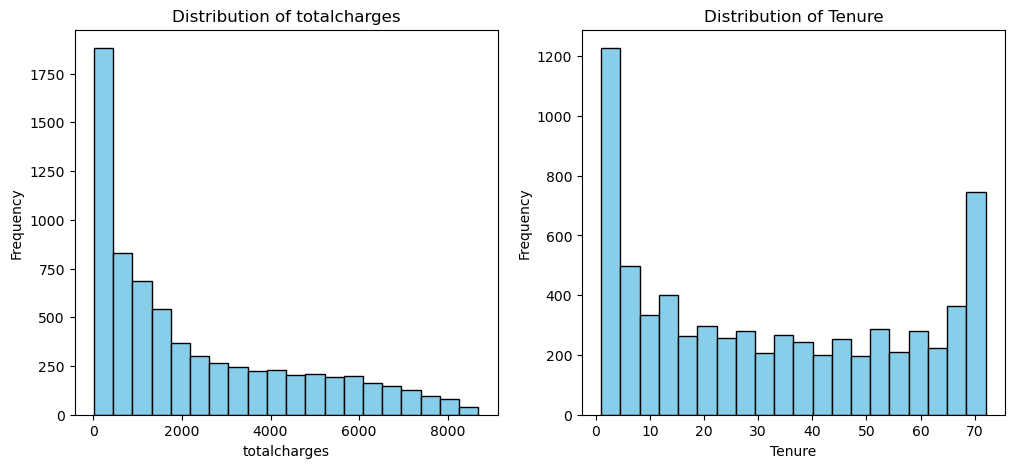

In [15]:
#פירוט 1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# גרף 1 התפלגות totalcharges
axes[0].hist(df['totalcharges'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of totalcharges')
axes[0].set_xlabel('totalcharges')
axes[0].set_ylabel('Frequency')

# גרף 2 התפלגות Tenure
axes[1].hist(df['tenure'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('Distribution of Tenure')
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Frequency')

plt.show()

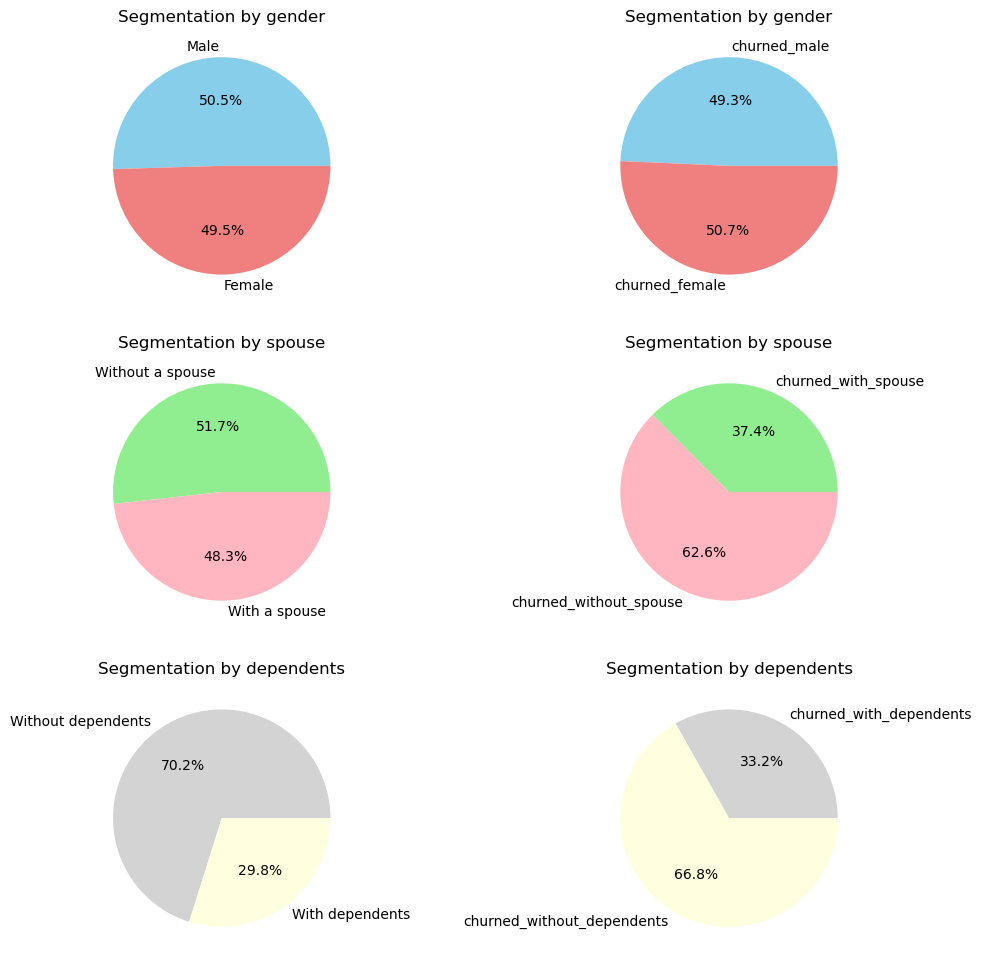

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# פילוח לפי מגדר
gender_counts = df['gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=["Male", "Female"], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Segmentation by gender')

def get_churned_percentage(group_name, group_value):
    churned_group_a_count = df[(df[group_name]==group_value) & (df['churn']=='Yes')].shape[0]
    total_group_a_count = df[df[group_name]==group_value].shape[0]
    return (churned_group_a_count/total_group_a_count)

group_a_percentage = get_churned_percentage('gender', 'Male')
group_b_percentage = get_churned_percentage('gender', 'Female')
axes[0, 1].pie([group_a_percentage,group_b_percentage], labels=["churned_male", "churned_female"], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Segmentation by gender')

# פילוח לפי בן/בת זוג
partner_counts = df['partner'].value_counts()
axes[1, 0].pie(partner_counts, labels=['Without a spouse','With a spouse'], autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])
axes[1, 0].set_title('Segmentation by spouse')

group_a_percentage = get_churned_percentage('partner', 'Yes')
group_b_percentage = get_churned_percentage('partner', 'No')
axes[1, 1].pie([group_a_percentage,group_b_percentage], labels=["churned_with_spouse", "churned_without_spouse"], autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])
axes[1, 1].set_title('Segmentation by spouse')

# פילוח לפי תלויים
dependents_counts = df['dependents'].value_counts()
axes[2, 0].pie(dependents_counts, labels=['Without dependents', 'With dependents'], autopct='%1.1f%%', colors=['lightgrey', 'lightyellow'])
axes[2, 0].set_title('Segmentation by dependents')

group_a_percentage = get_churned_percentage('dependents', 'Yes')
group_b_percentage = get_churned_percentage('dependents', 'No')
axes[2, 1].pie([group_a_percentage,group_b_percentage], labels=["churned_with_dependents", "churned_without_dependents"], autopct='%1.1f%%', colors=['lightgrey', 'lightyellow'])
axes[2, 1].set_title('Segmentation by dependents')

# # פילוח לפי עזיבה
# churn_counts = df['churn'].value_counts()
# axes[1, 1].pie(churn_counts, labels=['Didn\'t leave', 'Leave'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
# axes[1, 1].set_title('Segmentation by departure')

plt.show()

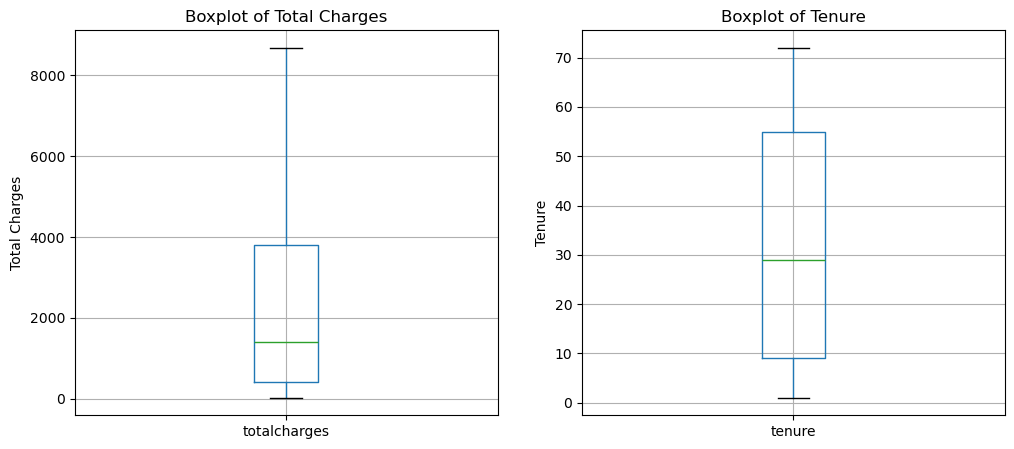

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# גרף 1 Boxplot ל-totalcharges
df.boxplot(column='totalcharges', ax=axes[0])
axes[0].set_title('Boxplot of Total Charges')
axes[0].set_ylabel('Total Charges')

# גרף 2 Boxplot ל-Tenure
df.boxplot(column='tenure', ax=axes[1])
axes[1].set_title('Boxplot of Tenure')
axes[1].set_ylabel('Tenure')

plt.show()

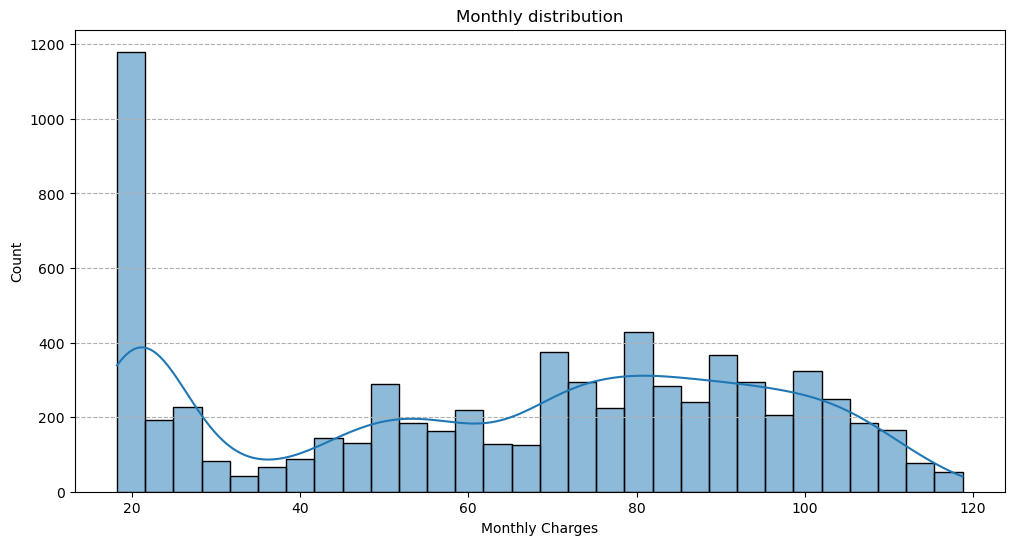

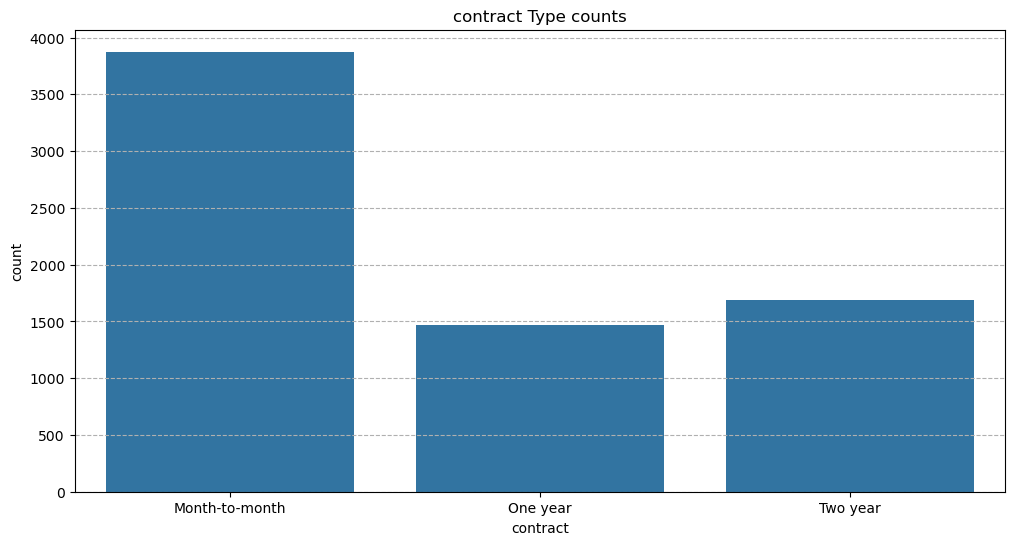

In [18]:
#  גרף התפלגות עמודה מספרית (monthlycharges)
plt.figure(figsize=(12, 6))
sns.histplot(df['monthlycharges'], bins=30, kde=True)
plt.title('Monthly distribution')
plt.xlabel('Monthly Charges')
plt.grid(axis='y', linestyle='--')
plt.show()

#  גרף פילוח לפי contract ו-churn
plt.figure(figsize=(12, 6))
sns.countplot(x='contract',  data=df) 
plt.title('contract Type counts')
plt.grid(axis='y', linestyle='--')
plt.show()

<h1>Data Engineering / Prep </h1>

In [19]:
def create_dummies(data_frame, column_name):
    return pd.get_dummies(data_frame, columns=[column_name], prefix=column_name, drop_first=True,dtype=int)

In [20]:
df['charge_diff'] = df['totalcharges'] - (df['monthlycharges']*df['tenure'])
# if the number is negative we assume the price raised during the tenure
# if the number is 0 there was no change in price during the tenure
# if the number is positive we assume the price dropped during the tenure
df['price_remain'] = (df['charge_diff'] == 0).astype(int)
df['price_raised'] = (df['charge_diff'] < 0).astype(int)
df['price_dropped'] = (df['charge_diff'] > 0).astype(int)


df.loc[df.churn == 'No','churn'] =0
df.loc[df.churn == 'Yes','churn'] =1
df['churn'] = df['churn'].astype(int)

df.loc[df.gender == 'Male','gender']=0
df.loc[df.gender == 'Female','gender']=1
df['gender'] = df['gender'].astype(int)

df.loc[df.partner == 'No','partner']=0
df.loc[df.partner == 'Yes','partner']=1
df['partner'] = df['partner'].astype(int)

df.loc[df.dependents == 'No','dependents']=0
df.loc[df.dependents == 'Yes','dependents']=1
df['dependents'] = df['dependents'].astype(int)

df.loc[df.phoneservice == 'No','phoneservice'] =0
df.loc[df.phoneservice == 'Yes','phoneservice'] =1
df['phoneservice'] = df['phoneservice'].astype(int)

df.loc[df.paperlessbilling == 'No','paperlessbilling'] = 0
df.loc[df.paperlessbilling == 'Yes','paperlessbilling'] =1
df['paperlessbilling'] = df['paperlessbilling'].astype(int)

df = create_dummies(df, 'contract')
df = create_dummies(df, 'multiplelines')
df = create_dummies(df, 'internetservice')
df = create_dummies(df, 'onlinesecurity')
df = create_dummies(df, 'onlinebackup')
df = create_dummies(df, 'deviceprotection')
df = create_dummies(df, 'techsupport')
df = create_dummies(df, 'streamingtv')
df = create_dummies(df, 'streamingmovies')
df = create_dummies(df, 'paymentmethod')

customer_id = df['customerid']

print(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerid                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   seniorcitizen                          7032 non-null   int64  
 3   partner                                7032 non-null   int64  
 4   dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   phoneservice                           7032 non-null   int64  
 7   paperlessbilling                       7032 non-null   int64  
 8   monthlycharges                         7032 non-null   float64
 9   totalcharges                           7032 non-null   float64
 10  churn                                  7032 non-null   int64  
 11  charge_di

customerid  gender  seniorcitizen  partner  dependents  tenure  \
0   7590-VHVEG       1              0        1           0       1   
1   5575-GNVDE       0              0        0           0      34   
2   3668-QPYBK       0              0        0           0       2   
3   7795-CFOCW       0              0        0           0      45   
4   9237-HQITU       1              0        0           0       2   
5   9305-CDSKC       1              0        0           0       8   
6   1452-KIOVK       0              0        0           1      22   
7   6713-OKOMC       1              0        0           0      10   
8   7892-POOKP       1              0        1           0      28   
9   6388-TABGU       0              0        0           1      62   
10  9763-GRSKD       0              0        1           1      13   
11  7469-LKBCI       0              0        0           0      16   
12  8091-TTVAX       0              0        1           0      58   
13  0280-XJGEX       0              0        0           0      49   
14  5129-JLPIS       0              0        0           0      25   
15  3655-SNQYZ       1              0        1           1      69   
16  8191-XWSZG       1              0        0           0      52   
17  9959-WOFKT       0              0        0           1      71   
18  4190-MFLUW       1              0        1           1      10   
19  4183-MYFRB       1              0        0           0      21   

    phoneservice  paperlessbilling  monthlycharges  totalcharges  ...  \
0              0                 1           29.85         29.85  ...   
1              1                 0           56.95       1889.50  ...   
2              1                 1           53.85        108.15  ...   
3              0                 0           42.30       1840.75  ...   
4              1                 1           70.70        151.65  ...   
5              1                 1           99.65        820.50  ...   
6              1                 1           89.10       1949.40  ...   
7              0                 0           29.75        301.90  ...   
8              1                 1          104.80       3046.05  ...   
9              1                 0           56.15       3487.95  ...   
10             1                 1           49.95        587.45  ...   
11             1                 0           18.95        326.80  ...   
12             1                 0          100.35       5681.10  ...   
13             1                 1          103.70       5036.30  ...   
14             1                 1          105.50       2686.05  ...   
15             1                 0          113.25       7895.15  ...   
16             1                 0           20.65       1022.95  ...   
17             1                 0          106.70       7382.25  ...   
18             1                 0           55.20        528.35  ...   
19             1                 1           90.05       1862.90  ...   

    deviceprotection_Yes  techsupport_No internet service  techsupport_Yes  \
0                      0                                0                0   
1                      1                                0                0   
2                      0                                0                0   
3                      1                                0                1   
4                      0                                0                0   
5                      1                                0                0   
6                      0                                0                0   
7                      0                                0                0   
8                      1                                0                1   
9                      0                                0                0   
10                     0                                0                0   
11                     0                                1      

In [21]:
df['combined'] = df['internetservice_Fiber optic'] | df['internetservice_No'] | \
       df['onlinesecurity_No internet service'] | df['onlinesecurity_Yes'] | \
       df['onlinebackup_No internet service'] | df['onlinebackup_Yes'] | \
       df['deviceprotection_No internet service'] | df['deviceprotection_Yes'] | \
       df['techsupport_No internet service'] | df['techsupport_Yes'] | \
       df['streamingtv_No internet service'] | df['streamingtv_Yes'] | \
       df['streamingmovies_No internet service'] | df['streamingmovies_Yes']

sum_all_combined = df['internetservice_Fiber optic'] + df['internetservice_No'] + \
       df['onlinesecurity_No internet service'] + df['onlinesecurity_Yes'] + \
       df['onlinebackup_No internet service'] + df['onlinebackup_Yes'] + \
       df['deviceprotection_No internet service'] + df['deviceprotection_Yes'] + \
       df['techsupport_No internet service'] + df['techsupport_Yes'] + \
       df['streamingtv_No internet service'] + df['streamingtv_Yes'] + \
       df['streamingmovies_No internet service'] + df['streamingmovies_Yes']
df['combined_majority'] = (sum_all_combined > 6).astype(int)

df.drop(['internetservice_Fiber optic', 'internetservice_No','onlinesecurity_No internet service','onlinesecurity_Yes'], axis=1, inplace=True)
df.drop(['onlinebackup_No internet service','onlinebackup_Yes','deviceprotection_No internet service', 'deviceprotection_Yes'], axis=1, inplace=True)
df.drop(['techsupport_No internet service', 'techsupport_Yes','streamingtv_No internet service', 'streamingtv_Yes'], axis=1, inplace=True)
df.drop(['streamingmovies_No internet service', 'streamingmovies_Yes'], axis=1, inplace=True)
df

customerid  gender  seniorcitizen  partner  dependents  tenure  \
0     7590-VHVEG       1              0        1           0       1   
1     5575-GNVDE       0              0        0           0      34   
2     3668-QPYBK       0              0        0           0       2   
3     7795-CFOCW       0              0        0           0      45   
4     9237-HQITU       1              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       0              0        1           1      24   
7039  2234-XADUH       1              0        1           1      72   
7040  4801-JZAZL       1              0        1           1      11   
7041  8361-LTMKD       0              1        1           0       4   
7042  3186-AJIEK       0              0        0           0      66   

      phoneservice  paperlessbilling  monthlycharges  totalcharges  ...  \
0                0                 1           29.85         29.85  ...   
1                1                 0           56.95       1889.50  ...   
2                1                 1           53.85        108.15  ...   
3                0                 0           42.30       1840.75  ...   
4                1                 1           70.70        151.65  ...   
...            ...               ...             ...           ...  ...   
7038             1                 1           84.80       1990.50  ...   
7039             1                 1          103.20       7362.90  ...   
7040             0                 1           29.60        346.45  ...   
7041             1                 1           74.40        306.60  ...   
7042             1                 1          105.65       6844.50  ...   

      price_dropped  contract_One year  contract_Two year  \
0                 0                  0                  0   
1                 0                  1                  0   
2                 1                  0                  0   
3                 0                  1                  0   
4                 1                  0                  0   
...             ...                ...                ...   
7038              0                  1                  0   
7039              0                  1                  0   
7040              1                  0                  0   
7041              1                  0                  0   
7042              0                  0                  1   

      multiplelines_No phone service  multiplelines_Yes  \
0                                  1                  0   
1                                  0                  0   
2                                  0                  0   
3                                  1                  0   
4                                  0                  0   
...                              ...                ...   
7038                               0                  1   
7039                               0                  1   
7040                               1                  0   
7041                               0                  1   
7042                               0                  0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0                               1   
7041    

In [22]:
df.isnull().sum()

customerid                               0
gender                                   0
seniorcitizen                            0
partner                                  0
dependents                               0
tenure                                   0
phoneservice                             0
paperlessbilling                         0
monthlycharges                           0
totalcharges                             0
churn                                    0
charge_diff                              0
price_remain                             0
price_raised                             0
price_dropped                            0
contract_One year                        0
contract_Two year                        0
multiplelines_No phone service           0
multiplelines_Yes                        0
paymentmethod_Credit card (automatic)    0
paymentmethod_Electronic check           0
paymentmethod_Mailed check               0
combined                                 0
combined_ma

In [23]:
#פירוט 3

# סט 1 חלוקה רחבה
def categorize_tenure_set1(tenure):
    if tenure <= 12:
        return '0-12'
    elif 13 <= tenure <= 36:
        return '13-36'
    elif 37 <= tenure <= 60:
        return '37-60'
    else:
        return '60+'

# סט 2 (6 חודשים)
def categorize_tenure_set2(tenure):
    if tenure <= 6:
        return '0-6'
    elif 7 <= tenure <= 12:
        return '7-12'
    elif 13 <= tenure <= 18:
        return '13-18'
    elif 19 <= tenure <= 24:
        return '19-24'
    elif 25 <= tenure <= 30:
        return '25-30'
    elif 31 <= tenure <= 36:
        return '31-36'
    elif 37 <= tenure <= 42:
        return '37-42'
    elif 43 <= tenure <= 48:
        return '43-48'
    elif 49 <= tenure <= 54:
        return '49-54'
    elif 55 <= tenure <= 60:
        return '55-60'
    else:
        return '60+'

# סט 3 (10 חודשים)
def categorize_tenure_set3(tenure):
    if tenure <= 10:
        return '0-10'
    elif 11 <= tenure <= 20:
        return '11-20'
    elif 21 <= tenure <= 30:
        return '21-30'
    elif 31 <= tenure <= 40:
        return '31-40'
    elif 41 <= tenure <= 50:
        return '41-50'
    elif 51 <= tenure <= 60:
        return '51-60'
    else:
        return '60+'

df['tenure_category_set1'] = df['tenure'].apply(categorize_tenure_set1)
df['tenure_category_set2'] = df['tenure'].apply(categorize_tenure_set2)
df['tenure_category_set3'] = df['tenure'].apply(categorize_tenure_set3)

categories_set1 = ['0-12', '13-36', '37-60', '60+']
categories_set2 = ['0-6', '7-12', '13-18', '19-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-60', '60+']
categories_set3 = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

In [24]:
stats_set1 = df.groupby(['churn','tenure_category_set1'])['monthlycharges'].agg(['mean'])
stats_set2 = df.groupby(['churn','tenure_category_set2'])['monthlycharges'].agg(['mean'])
stats_set3 = df.groupby(['churn','tenure_category_set3'])['monthlycharges'].agg(['mean'])

avg_std_set1 = stats_set1.groupby('churn')[['mean']].agg('mean')
avg_std_set2 = stats_set2.groupby('churn')[['mean']].agg('mean')
avg_std_set3 = stats_set3.groupby('churn')[['mean']].agg('mean')

In [25]:
print(stats_set1)
print(avg_std_set1)
print(stats_set2)
print(avg_std_set2)
print(stats_set3)
print(avg_std_set3)

                                 mean
churn tenure_category_set1           
0     0-12                  46.766169
      13-36                 57.264146
      37-60                 64.978405
      60+                   74.440563
1     0-12                  66.493973
      13-36                 80.695359
      37-60                 86.326226
      60+                   97.317742
            mean
churn           
0      60.862321
1      82.708325
                                 mean
churn tenure_category_set2           
0     0-6                   44.775875
      13-18                 53.754582
      19-24                 55.167827
      25-30                 58.506083
      31-36                 62.458095
      37-42                 60.376351
      43-48                 63.453427
      49-54                 66.326847
      55-60                 68.803611
      60+                   74.440563
      7-12                  49.786836
1     0-6                   63.642985
      13-18         

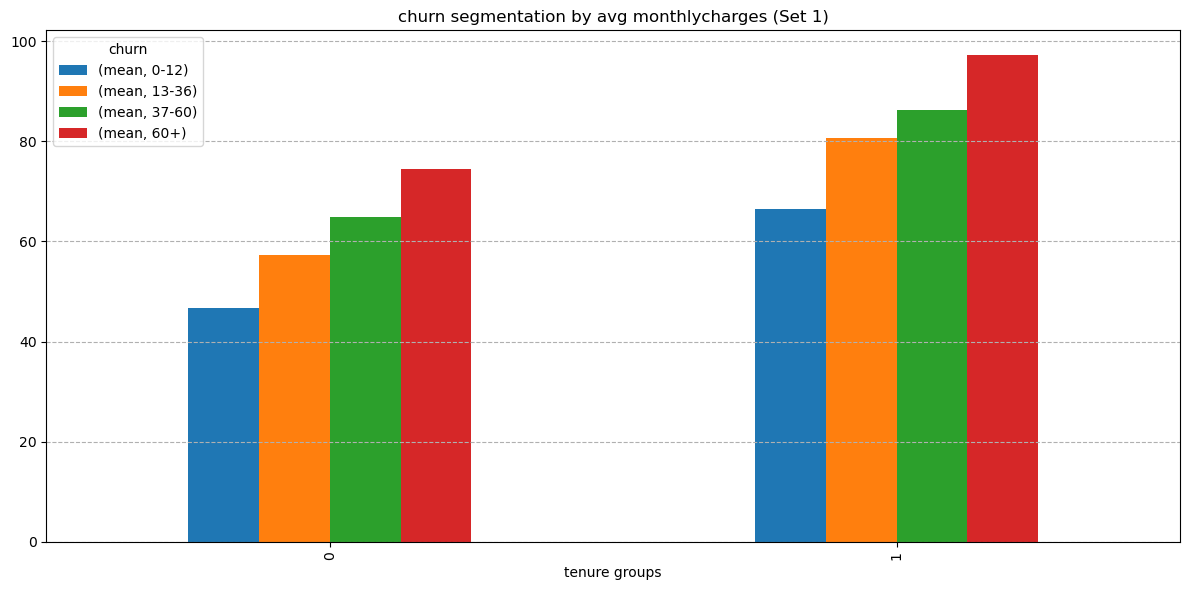

In [26]:
unstacked = stats_set1.unstack()
unstacked.plot(kind='bar', figsize=(12, 6))

#plt.plot(x='tenure_category_set1', hue='churn', data=stats_set1, palette='coolwarm')
plt.title('churn segmentation by avg monthlycharges (Set 1)')
plt.xlabel('tenure groups')
plt.legend(title='churn')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

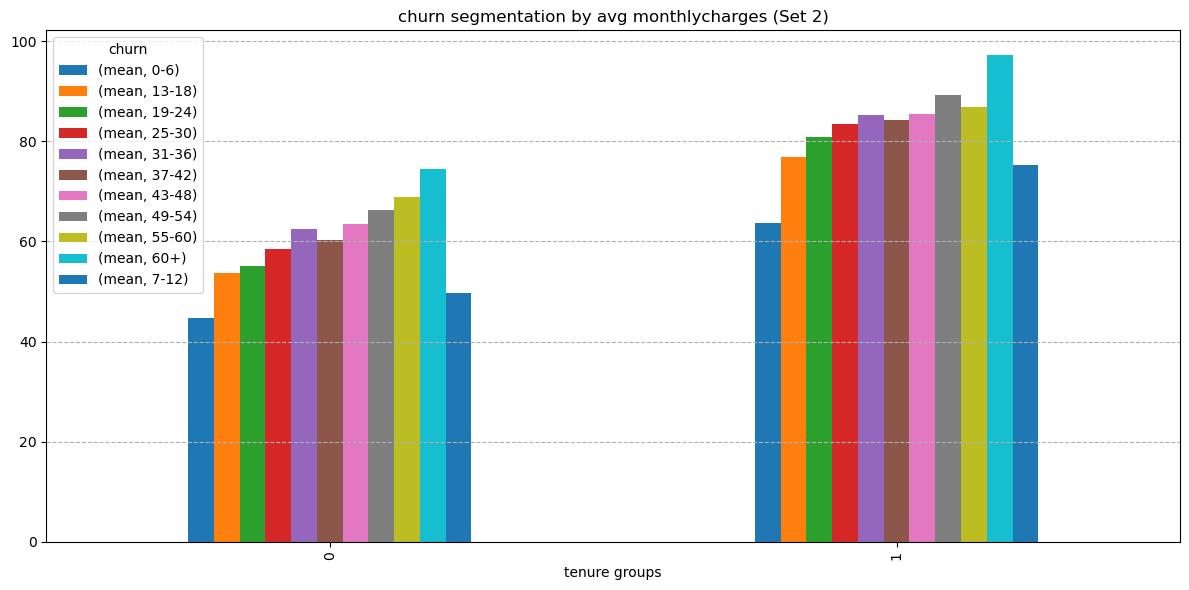

In [27]:
unstacked = stats_set2.unstack()
unstacked.plot(kind='bar', figsize=(12, 6))

plt.title('churn segmentation by avg monthlycharges (Set 2)')
plt.xlabel('tenure groups')
plt.legend(title='churn')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

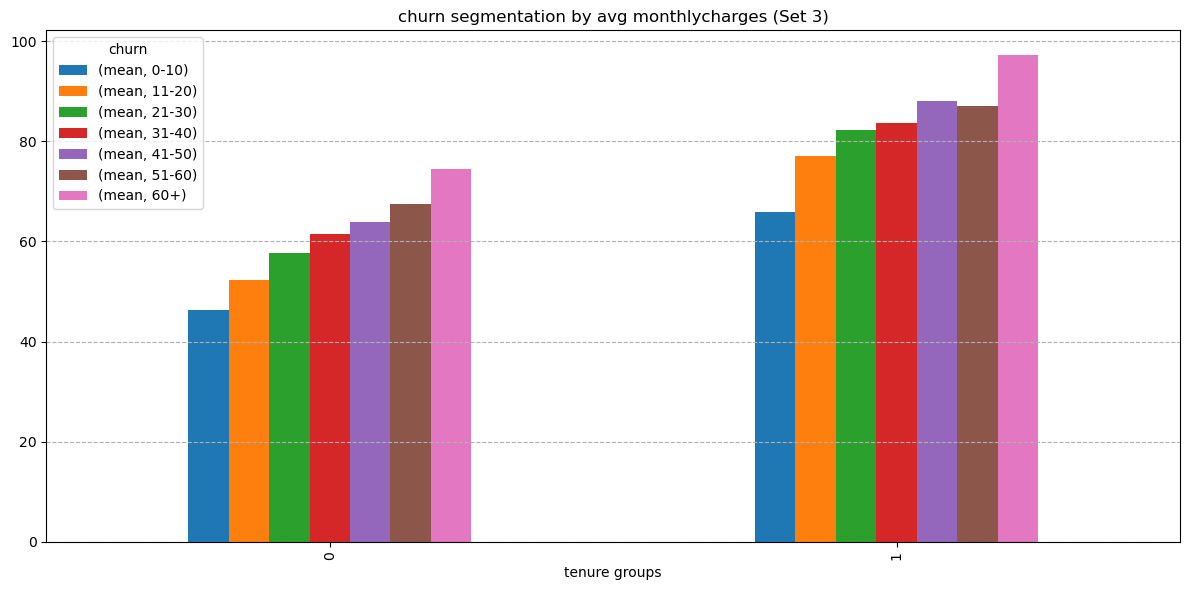

In [28]:
unstacked = stats_set3.unstack()
unstacked.plot(kind='bar', figsize=(12, 6))

plt.title('churn segmentation by avg monthlycharges (Set 3)')
plt.xlabel('tenure groups')
plt.legend(title='churn')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

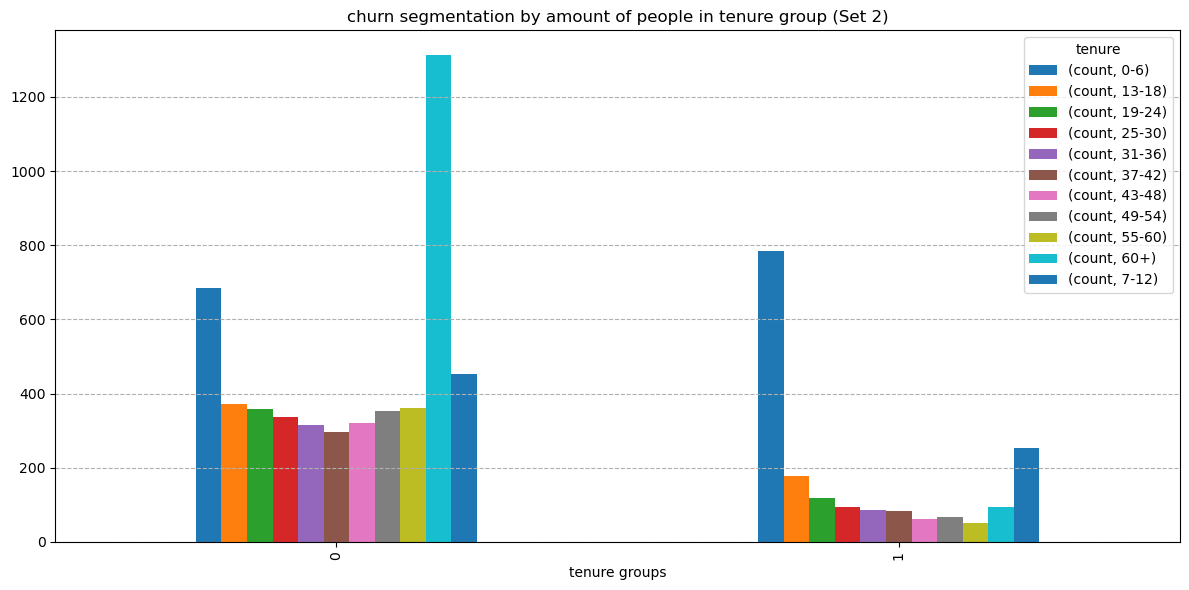

In [29]:
data_set2 = df.groupby(['churn','tenure_category_set2'])['partner'].agg(['count'])
unstacked = data_set2.unstack()
unstacked.plot(kind='bar', figsize=(12, 6))
plt.title('churn segmentation by amount of people in tenure group (Set 2)')
plt.xlabel('tenure groups')
plt.legend(title='tenure')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

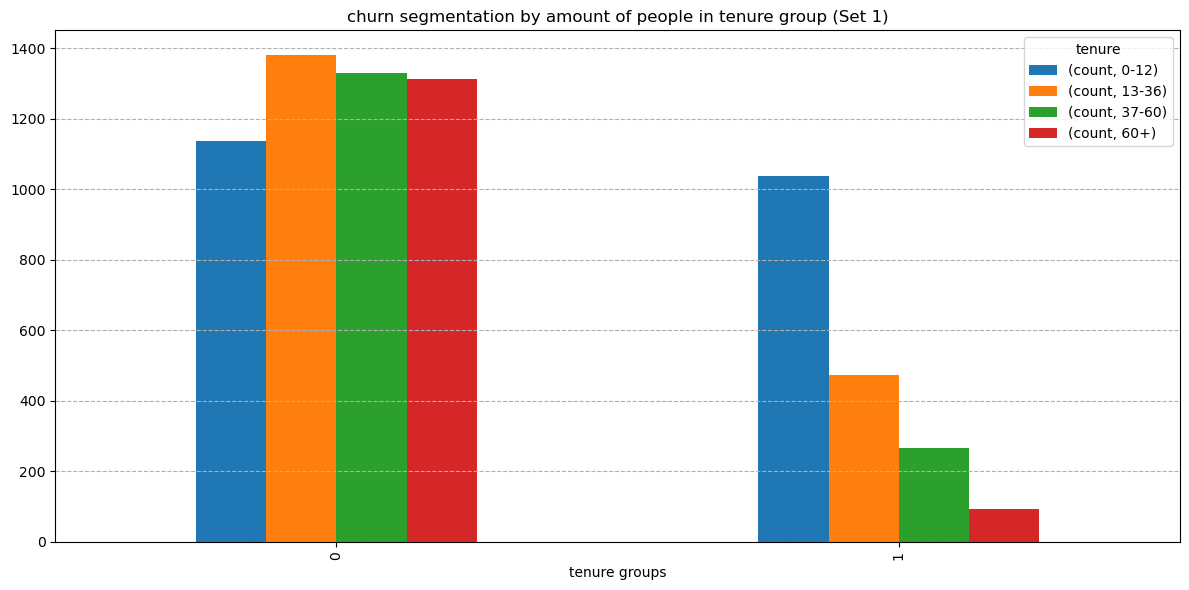

In [30]:
data_set1 = df.groupby(['churn','tenure_category_set1'])['partner'].agg(['count'])
unstacked = data_set1.unstack()
unstacked.plot(kind='bar', figsize=(12, 6))
plt.title('churn segmentation by amount of people in tenure group (Set 1)')
plt.xlabel('tenure groups')
plt.legend(title='tenure')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

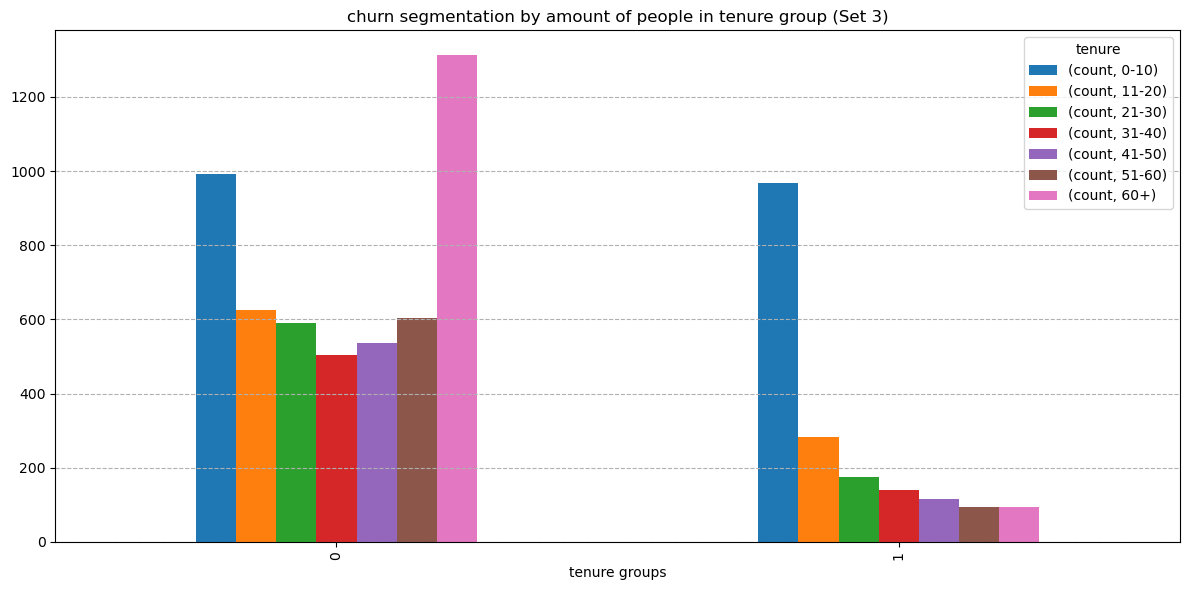

In [31]:
data_set3 = df.groupby(['churn','tenure_category_set3'])['partner'].agg(['count'])
unstacked = data_set3.unstack()
unstacked.plot(kind='bar', figsize=(12, 6))
plt.title('churn segmentation by amount of people in tenure group (Set 3)')
plt.xlabel('tenure groups')
plt.legend(title='tenure')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

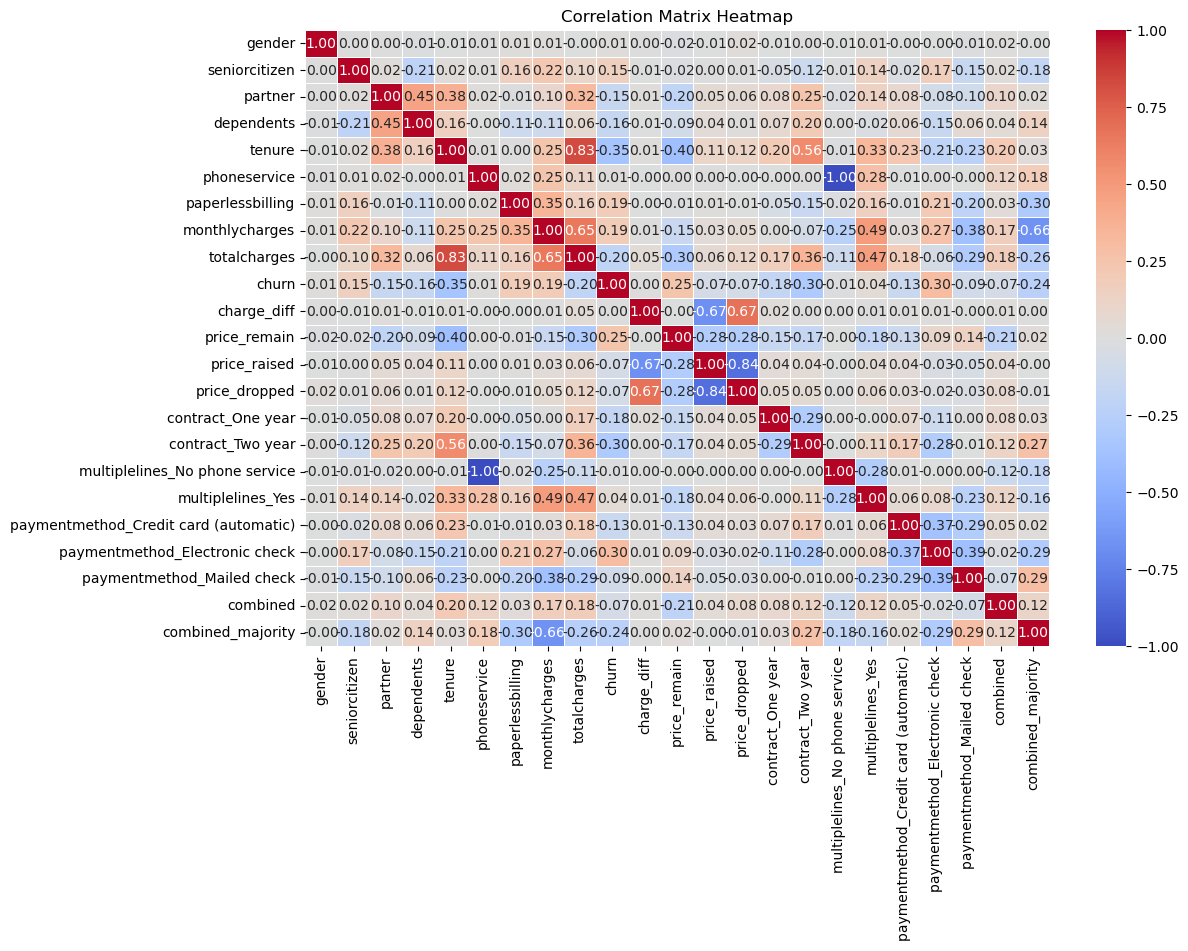

In [32]:
# חישוב קורלציות אחרי המרה
corr_matrix = df.corr(numeric_only=True)

# יצירת heatmap לכלל הנתונים
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
#corr_matrix.index

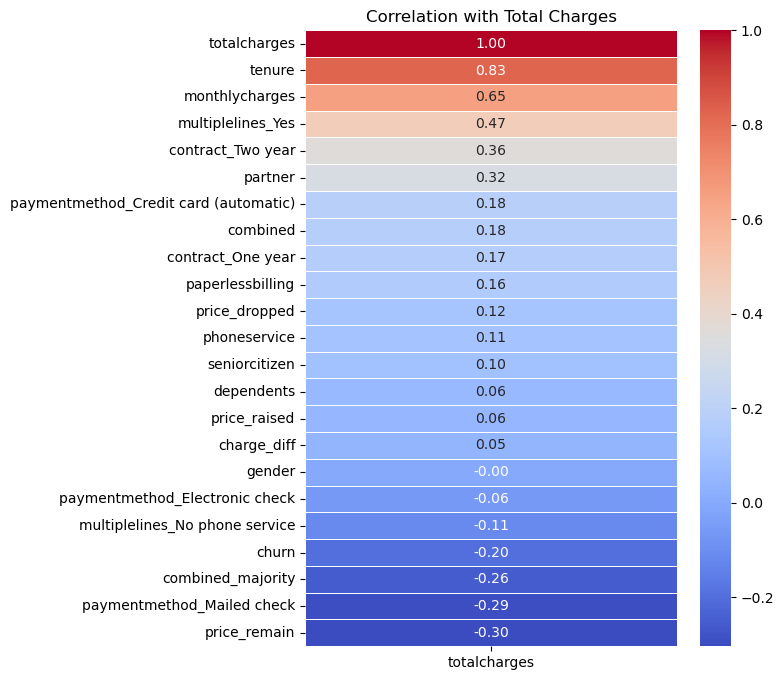

In [33]:
corr_totalcharges = corr_matrix[['totalcharges']].sort_values(by='totalcharges', ascending=False)


plt.figure(figsize=(6, 8))
sns.heatmap(corr_totalcharges, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation with Total Charges")
plt.show()


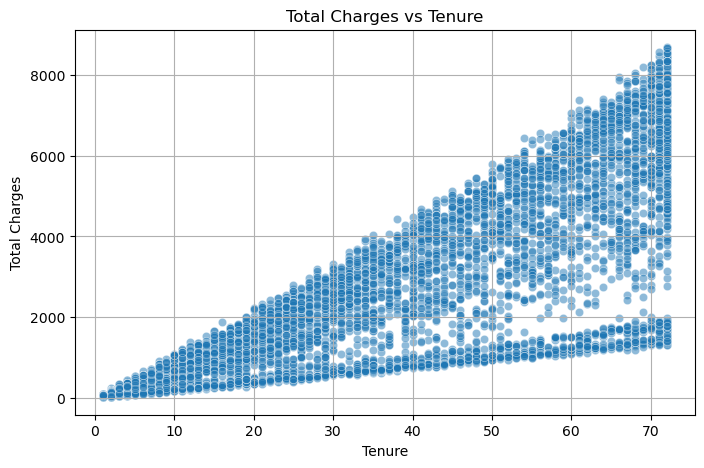

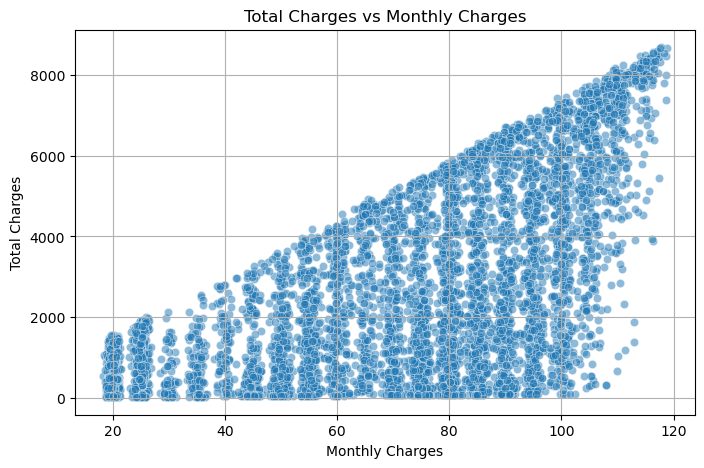

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['tenure'], y=df['totalcharges'], alpha=0.5)
plt.title("Total Charges vs Tenure")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.grid()
plt.show()


#     נחוץ??
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['monthlycharges'], y=df['totalcharges'], alpha=0.5)
plt.title("Total Charges vs Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.grid()
plt.show()


In [35]:
#final preps
df = df.drop(columns=['tenure_category_set1'])
df = df.drop(columns=['tenure_category_set2'])
df = df.drop(columns=['tenure_category_set3'])

df = df.reindex(sorted(df.columns), axis=1)

<h1> ML </h1>

In [36]:
#!pip install scikit-learn
#!pip install graphviz

In [37]:
from sklearn.model_selection import train_test_split

test_size = round(df.index.size * 0.2)
train, test = train_test_split(df, test_size=test_size, random_state=42, shuffle=True)

label = 'churn'
cus_id = 'customerid'

x_train = train.drop(label, axis=1)
x_train = x_train.drop(cus_id, axis=1)
y_train = train[label]
cus_id_train = train[cus_id]

x_test = test.drop(label, axis=1)
x_test = x_test.drop(cus_id, axis=1)
y_test = test[label]
cus_id_test = test[cus_id]

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)

In [38]:
train

customerid  gender  seniorcitizen  partner  dependents  tenure  \
3984  5884-FBCTL       1              0        1           1      72   
6030  2027-OAQQC       1              0        0           0      43   
3410  4918-QLLIW       0              0        0           0       3   
5483  5536-SLHPM       1              0        1           0      55   
5524  1716-LSAMB       0              0        1           1      45   
...          ...     ...            ...      ...         ...     ...   
3778  9631-XEYKE       0              0        0           0       3   
5199  7245-JMTTQ       1              0        0           0      51   
5235  4299-SIMNS       0              0        0           0       9   
5399  2589-AYCRP       1              0        0           0      50   
862   0947-MUGVO       0              1        1           0      20   

      phoneservice  paperlessbilling  monthlycharges  totalcharges  ...  \
3984             1                 0           25.10       1857.85  ...   
6030             0                 1           49.05       2076.20  ...   
3410             1                 0           53.40        188.70  ...   
5483             1                 1           77.75       4458.15  ...   
5524             1                 0           54.65       2553.70  ...   
...            ...               ...             ...           ...  ...   
3778             1                 0           50.40        137.25  ...   
5199             1                 1          111.50       5703.25  ...   
5235             1                 1           81.15        784.45  ...   
5399             1                 0           19.75        989.05  ...   
862              1                 1           73.65       1463.50  ...   

      price_dropped  contract_One year  contract_Two year  \
3984              1                  0                  1   
6030              0                  0                  0   
3410              1                  0                  0   
5483              1                  0                  0   
5524              1                  0                  1   
...             ...                ...                ...   
3778              0                  0                  0   
5199              1                  1                  0   
5235              1                  0                  0   
5399              1                  1                  0   
862               0                  0                  0   

      multiplelines_No phone service  multiplelines_Yes  \
3984                               0                  1   
6030                               1                  0   
3410                               0                  0   
5483                               0                  1   
5524                               0                  0   
...                              ...                ...   
3778                               0                  1   
5199                               0                  1   
5235                               0                  1   
5399                               0                  0   
862                                0                  0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
3984                                      0                               0   
6030                                      0                               0   
3410                                      1                               0   
5483                                      0                               1   
5524                                      0                               0   
...                                     ...                             ...   
3778                                      0                               0   
5199                                      0                               1   
5235                                      0                               1   
5399    

In [39]:
test

customerid  gender  seniorcitizen  partner  dependents  tenure  \
2481  6614-YWYSC       0              1        1           0      61   
6784  9546-KDTRB       1              0        0           0      19   
6125  0871-URUWO       0              0        1           0      13   
3052  5151-HQRDG       0              0        1           0      37   
4099  6624-JDRDS       1              0        0           0       6   
...          ...     ...            ...      ...         ...     ...   
1428  7767-UXAGJ       0              0        0           0       1   
1733  1015-OWJKI       0              0        0           0       1   
5250  3338-CVVEH       0              0        0           0      12   
5465  6933-FHBZC       1              0        0           0      26   
5851  4118-CEVPF       1              1        0           0      35   

      phoneservice  paperlessbilling  monthlycharges  totalcharges  ...  \
2481             1                 0           25.00       1501.75  ...   
6784             1                 0           24.70        465.85  ...   
6125             1                 1          102.25       1359.00  ...   
3052             1                 1           55.05       2030.75  ...   
4099             0                 0           29.45        161.45  ...   
...            ...               ...             ...           ...  ...   
1428             1                 1           50.45         50.45  ...   
1733             1                 0           19.05         19.05  ...   
5250             1                 0           94.55       1173.55  ...   
5465             1                 1           56.05       1553.20  ...   
5851             1                 1          110.80       3836.30  ...   

      price_dropped  contract_One year  contract_Two year  \
2481              0                  0                  1   
6784              0                  0                  0   
6125              1                  0                  0   
3052              0                  0                  0   
4099              0                  0                  0   
...             ...                ...                ...   
1428              0                  0                  0   
1733              0                  0                  0   
5250              1                  0                  0   
5465              1                  1                  0   
5851              0                  1                  0   

      multiplelines_No phone service  multiplelines_Yes  \
2481                               0                  1   
6784                               0                  1   
6125                               0                  1   
3052                               0                  1   
4099                               1                  0   
...                              ...                ...   
1428                               0                  1   
1733                               0                  0   
5250                               0                  1   
5465                               0                  0   
5851                               0                  1   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
2481                                      0                               0   
6784                                      0                               0   
6125                                      1                               0   
3052                                      0                               0   
4099                                      0                               0   
...                                     ...                             ...   
1428                                      0                               1   
1733                                      0                               0   
5250                                      0                               1   
5465    

In [40]:
x_train

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
3984     1.0            0.0      1.0         1.0    72.0           1.0   
6030     1.0            0.0      0.0         0.0    43.0           0.0   
3410     0.0            0.0      0.0         0.0     3.0           1.0   
5483     1.0            0.0      1.0         0.0    55.0           1.0   
5524     0.0            0.0      1.0         1.0    45.0           1.0   
...      ...            ...      ...         ...     ...           ...   
3778     0.0            0.0      0.0         0.0     3.0           1.0   
5199     1.0            0.0      0.0         0.0    51.0           1.0   
5235     0.0            0.0      0.0         0.0     9.0           1.0   
5399     1.0            0.0      0.0         0.0    50.0           1.0   
862      0.0            1.0      1.0         0.0    20.0           1.0   

      paperlessbilling  monthlycharges  totalcharges  charge_diff  ...  \
3984               0.0           25.10       1857.85        50.65  ...   
6030               1.0           49.05       2076.20       -32.95  ...   
3410               0.0           53.40        188.70        28.50  ...   
5483               1.0           77.75       4458.15       181.90  ...   
5524               0.0           54.65       2553.70        94.45  ...   
...                ...             ...           ...          ...  ...   
3778               0.0           50.40        137.25       -13.95  ...   
5199               1.0          111.50       5703.25        16.75  ...   
5235               1.0           81.15        784.45        54.10  ...   
5399               0.0           19.75        989.05         1.55  ...   
862                1.0           73.65       1463.50        -9.50  ...   

      price_dropped  contract_One year  contract_Two year  \
3984            1.0                0.0                1.0   
6030            0.0                0.0                0.0   
3410            1.0                0.0                0.0   
5483            1.0                0.0                0.0   
5524            1.0                0.0                1.0   
...             ...                ...                ...   
3778            0.0                0.0                0.0   
5199            1.0                1.0                0.0   
5235            1.0                0.0                0.0   
5399            1.0                1.0                0.0   
862             0.0                0.0                0.0   

      multiplelines_No phone service  multiplelines_Yes  \
3984                             0.0                1.0   
6030                             1.0                0.0   
3410                             0.0                0.0   
5483                             0.0                1.0   
5524                             0.0                0.0   
...                              ...                ...   
3778                             0.0                1.0   
5199                             0.0                1.0   
5235                             0.0                1.0   
5399                             0.0                0.0   
862                              0.0                0.0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
3984                                    0.0                             0.0   
6030                                    0.0                             0.0   
3410                                    1.0                             0.0   
5483                                    0.0                             1.0   
5524                                    0.0                             0.0   
...                                     ...                             ...   
3778                                    0.0                             0.0   
5199                                    0.0                             1.0   
5235                                    0.0                             1.0

In [41]:
x_test

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
2481     0.0            1.0      1.0         0.0    61.0           1.0   
6784     1.0            0.0      0.0         0.0    19.0           1.0   
6125     0.0            0.0      1.0         0.0    13.0           1.0   
3052     0.0            0.0      1.0         0.0    37.0           1.0   
4099     1.0            0.0      0.0         0.0     6.0           0.0   
...      ...            ...      ...         ...     ...           ...   
1428     0.0            0.0      0.0         0.0     1.0           1.0   
1733     0.0            0.0      0.0         0.0     1.0           1.0   
5250     0.0            0.0      0.0         0.0    12.0           1.0   
5465     1.0            0.0      0.0         0.0    26.0           1.0   
5851     1.0            1.0      0.0         0.0    35.0           1.0   

      paperlessbilling  monthlycharges  totalcharges  charge_diff  ...  \
2481               0.0           25.00       1501.75       -23.25  ...   
6784               0.0           24.70        465.85        -3.45  ...   
6125               1.0          102.25       1359.00        29.75  ...   
3052               1.0           55.05       2030.75        -6.10  ...   
4099               0.0           29.45        161.45       -15.25  ...   
...                ...             ...           ...          ...  ...   
1428               1.0           50.45         50.45         0.00  ...   
1733               0.0           19.05         19.05         0.00  ...   
5250               0.0           94.55       1173.55        38.95  ...   
5465               1.0           56.05       1553.20        95.90  ...   
5851               1.0          110.80       3836.30       -41.70  ...   

      price_dropped  contract_One year  contract_Two year  \
2481            0.0                0.0                1.0   
6784            0.0                0.0                0.0   
6125            1.0                0.0                0.0   
3052            0.0                0.0                0.0   
4099            0.0                0.0                0.0   
...             ...                ...                ...   
1428            0.0                0.0                0.0   
1733            0.0                0.0                0.0   
5250            1.0                0.0                0.0   
5465            1.0                1.0                0.0   
5851            0.0                1.0                0.0   

      multiplelines_No phone service  multiplelines_Yes  \
2481                             0.0                1.0   
6784                             0.0                1.0   
6125                             0.0                1.0   
3052                             0.0                1.0   
4099                             1.0                0.0   
...                              ...                ...   
1428                             0.0                1.0   
1733                             0.0                0.0   
5250                             0.0                1.0   
5465                             0.0                0.0   
5851                             0.0                1.0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
2481                                    0.0                             0.0   
6784                                    0.0                             0.0   
6125                                    1.0                             0.0   
3052                                    0.0                             0.0   
4099                                    0.0                             0.0   
...                                     ...                             ...   
1428                                    0.0                             1.0   
1733                                    0.0                             0.0   
5250                                    0.0                             1.0

In [42]:
y_train

3984    0.0
6030    1.0
3410    1.0
5483    1.0
5524    0.0
       ... 
3778    0.0
5199    0.0
5235    0.0
5399    0.0
862     1.0
Name: churn, Length: 5626, dtype: float64

In [43]:
y_test

2481    0.0
6784    0.0
6125    1.0
3052    0.0
4099    0.0
       ... 
1428    1.0
1733    0.0
5250    0.0
5465    0.0
5851    0.0
Name: churn, Length: 1406, dtype: float64

In [44]:
cus_id_train

3984    5884-FBCTL
6030    2027-OAQQC
3410    4918-QLLIW
5483    5536-SLHPM
5524    1716-LSAMB
           ...    
3778    9631-XEYKE
5199    7245-JMTTQ
5235    4299-SIMNS
5399    2589-AYCRP
862     0947-MUGVO
Name: customerid, Length: 5626, dtype: object

In [45]:
cus_id_test

2481    6614-YWYSC
6784    9546-KDTRB
6125    0871-URUWO
3052    5151-HQRDG
4099    6624-JDRDS
           ...    
1428    7767-UXAGJ
1733    1015-OWJKI
5250    3338-CVVEH
5465    6933-FHBZC
5851    4118-CEVPF
Name: customerid, Length: 1406, dtype: object

In [46]:
x_train.shape, y_train.shape, cus_id_train.shape, x_test.shape, y_test.shape, cus_id_test.shape

((5626, 22), (5626,), (5626,), (1406, 22), (1406,), (1406,))

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

original_x_train = x_train
original_x_test = x_test

x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test) 

In [48]:
original_x_train

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
3984     1.0            0.0      1.0         1.0    72.0           1.0   
6030     1.0            0.0      0.0         0.0    43.0           0.0   
3410     0.0            0.0      0.0         0.0     3.0           1.0   
5483     1.0            0.0      1.0         0.0    55.0           1.0   
5524     0.0            0.0      1.0         1.0    45.0           1.0   
...      ...            ...      ...         ...     ...           ...   
3778     0.0            0.0      0.0         0.0     3.0           1.0   
5199     1.0            0.0      0.0         0.0    51.0           1.0   
5235     0.0            0.0      0.0         0.0     9.0           1.0   
5399     1.0            0.0      0.0         0.0    50.0           1.0   
862      0.0            1.0      1.0         0.0    20.0           1.0   

      paperlessbilling  monthlycharges  totalcharges  charge_diff  ...  \
3984               0.0           25.10       1857.85        50.65  ...   
6030               1.0           49.05       2076.20       -32.95  ...   
3410               0.0           53.40        188.70        28.50  ...   
5483               1.0           77.75       4458.15       181.90  ...   
5524               0.0           54.65       2553.70        94.45  ...   
...                ...             ...           ...          ...  ...   
3778               0.0           50.40        137.25       -13.95  ...   
5199               1.0          111.50       5703.25        16.75  ...   
5235               1.0           81.15        784.45        54.10  ...   
5399               0.0           19.75        989.05         1.55  ...   
862                1.0           73.65       1463.50        -9.50  ...   

      price_dropped  contract_One year  contract_Two year  \
3984            1.0                0.0                1.0   
6030            0.0                0.0                0.0   
3410            1.0                0.0                0.0   
5483            1.0                0.0                0.0   
5524            1.0                0.0                1.0   
...             ...                ...                ...   
3778            0.0                0.0                0.0   
5199            1.0                1.0                0.0   
5235            1.0                0.0                0.0   
5399            1.0                1.0                0.0   
862             0.0                0.0                0.0   

      multiplelines_No phone service  multiplelines_Yes  \
3984                             0.0                1.0   
6030                             1.0                0.0   
3410                             0.0                0.0   
5483                             0.0                1.0   
5524                             0.0                0.0   
...                              ...                ...   
3778                             0.0                1.0   
5199                             0.0                1.0   
5235                             0.0                1.0   
5399                             0.0                0.0   
862                              0.0                0.0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
3984                                    0.0                             0.0   
6030                                    0.0                             0.0   
3410                                    1.0                             0.0   
5483                                    0.0                             1.0   
5524                                    0.0                             0.0   
...                                     ...                             ...   
3778                                    0.0                             0.0   
5199                                    0.0                             1.0   
5235                                    0.0                             1.0

In [49]:
x_train

array([[ 1.0136012 , -0.43754349,  1.03878945, ..., -0.54736396,
         0.20692371,  1.78319712],
       [ 1.0136012 , -0.43754349, -0.96265899, ..., -0.54736396,
         0.20692371, -0.5607905 ],
       [-0.98658131, -0.43754349, -0.96265899, ..., -0.54736396,
         0.20692371, -0.5607905 ],
       ...,
       [-0.98658131, -0.43754349, -0.96265899, ..., -0.54736396,
         0.20692371, -0.5607905 ],
       [ 1.0136012 , -0.43754349, -0.96265899, ..., -0.54736396,
         0.20692371,  1.78319712],
       [-0.98658131,  2.28548711,  1.03878945, ..., -0.54736396,
         0.20692371, -0.5607905 ]])

In [50]:
#!pip install graphviz

# Plotting the decision tree
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# this is a function that we can always use for plotting decision trees, the function expects 3 arg as follows
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

<h2> Decision Tree </h2>

In [51]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=6)
model.fit(x_train, y_train) 

y_test_pred_DecisionTree = model.predict(x_test)

output = pd.DataFrame({cus_id: cus_id_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_DecisionTree}) 

test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)

print("Accuracy = ", test_acc)
output.head(10)

Accuracy =  0.7802275960170697


customerid  churned_what_actualy_happened  churned_predicted_by_model
2481  6614-YWYSC                            0.0                         0.0
6784  9546-KDTRB                            0.0                         0.0
6125  0871-URUWO                            1.0                         1.0
3052  5151-HQRDG                            0.0                         0.0
4099  6624-JDRDS                            0.0                         0.0
3223  3082-VQXNH                            0.0                         1.0
3774  1309-XGFSN                            0.0                         0.0
3469  9402-ORRAH                            0.0                         1.0
3420  8663-UPDGF                            0.0                         0.0
1196  0455-ENTCR                            0.0                         0.0

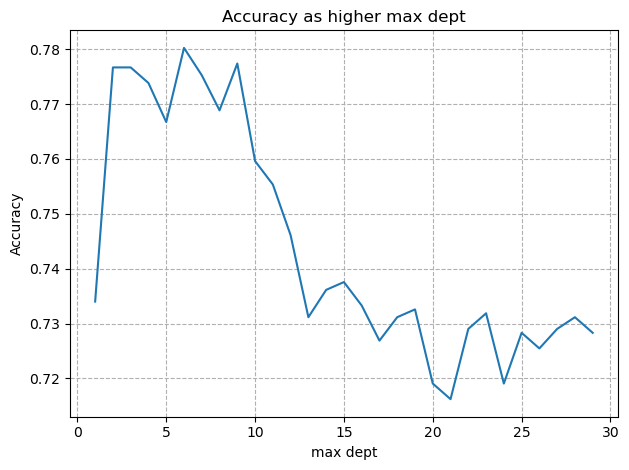

maximum accuracy at max dept:6 with accuracy=0.7802275960170697


In [52]:
iterations = list(range(1,30))
test_acc = []
for max_dept in iterations:
    model = DecisionTreeClassifier(max_depth=max_dept)
    model.fit(x_train, y_train) 
    y_test_pred_DecisionTree = model.predict(x_test)
    output = pd.DataFrame({cus_id: cus_id_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_DecisionTree}) 
    test_acc.append( accuracy_score(y_test, y_test_pred_DecisionTree) )

plt.plot(iterations, test_acc)
plt.title('Accuracy as higher max dept')
plt.xlabel('max dept')
plt.ylabel('Accuracy')
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

d = dict(zip(test_acc,iterations))
print(f"maximum accuracy at max dept:{d[max(d.keys())]} with accuracy={max(d.keys())}") 

In [53]:
plot_tree(model, original_x_train.columns, ['Not Churned', 'Churned'])

<h2> Random Forest model </h2>

In [54]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=24, max_depth=9, random_state=1)

model.fit(x_train, y_train) 

y_test_pred_RandomForest = model.predict(x_test) 

output = pd.DataFrame({cus_id: cus_id_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest})

test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
print("Accuracy = ", test_acc)
output.head(10)

Accuracy =  0.8001422475106685


customerid  churned_what_actualy_happened  churned_predicted_by_model
2481  6614-YWYSC                            0.0                         0.0
6784  9546-KDTRB                            0.0                         0.0
6125  0871-URUWO                            1.0                         0.0
3052  5151-HQRDG                            0.0                         0.0
4099  6624-JDRDS                            0.0                         0.0
3223  3082-VQXNH                            0.0                         0.0
3774  1309-XGFSN                            0.0                         0.0
3469  9402-ORRAH                            0.0                         1.0
3420  8663-UPDGF                            0.0                         0.0
1196  0455-ENTCR                            0.0                         0.0

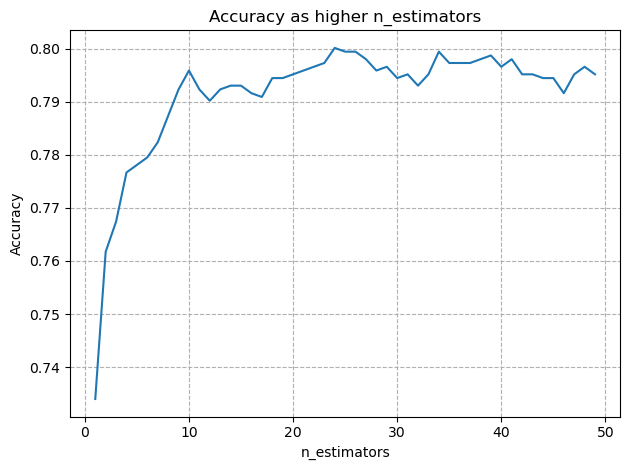

maximum accuracy at n_estimators:24 with accuracy=0.8001422475106685


In [55]:
iterations = list(range(1,50))
test_acc = []
for n in iterations:
    model = RandomForestClassifier(n_estimators=n, max_depth=9, random_state=1)
    model.fit(x_train, y_train) 
    y_test_pred_RandomForest = model.predict(x_test) 
    output = pd.DataFrame({cus_id: cus_id_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest})
    test_acc.append( accuracy_score(y_test, y_test_pred_RandomForest) )

plt.plot(iterations, test_acc)
plt.title('Accuracy as higher n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

d = dict(zip(test_acc,iterations))
print(f"maximum accuracy at n_estimators:{d[max(d.keys())]} with accuracy={max(d.keys())}") 

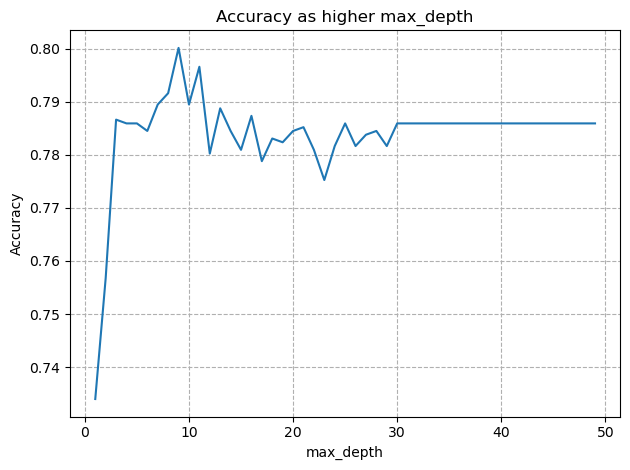

maximum accuracy at max_depth:9 with accuracy=0.8001422475106685


In [56]:
iterations = list(range(1,50))
test_acc = []
for n in iterations:
    model = RandomForestClassifier(n_estimators=24, max_depth=n, random_state=1)
    model.fit(x_train, y_train) 
    y_test_pred_RandomForest = model.predict(x_test) 
    output = pd.DataFrame({cus_id: cus_id_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest})
    test_acc.append( accuracy_score(y_test, y_test_pred_RandomForest) )

plt.plot(iterations, test_acc)
plt.title('Accuracy as higher max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

d = dict(zip(test_acc,iterations))
print(f"maximum accuracy at max_depth:{d[max(d.keys())]} with accuracy={max(d.keys())}") 

<h2> KNN - K Nearest Neighbors </h2>

In [57]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=39)

model.fit(x_train, y_train) 

y_test_pred_KNN = model.predict(x_test) 

output = pd.DataFrame({cus_id: cus_id_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_KNN})

test_acc = accuracy_score(y_test, y_test_pred_KNN)
print("Accuracy = ", test_acc)
output.head(10)

Accuracy =  0.7837837837837838


customerid  churned_what_actualy_happened  churned_predicted_by_model
2481  6614-YWYSC                            0.0                         0.0
6784  9546-KDTRB                            0.0                         0.0
6125  0871-URUWO                            1.0                         0.0
3052  5151-HQRDG                            0.0                         0.0
4099  6624-JDRDS                            0.0                         0.0
3223  3082-VQXNH                            0.0                         0.0
3774  1309-XGFSN                            0.0                         0.0
3469  9402-ORRAH                            0.0                         1.0
3420  8663-UPDGF                            0.0                         1.0
1196  0455-ENTCR                            0.0                         0.0

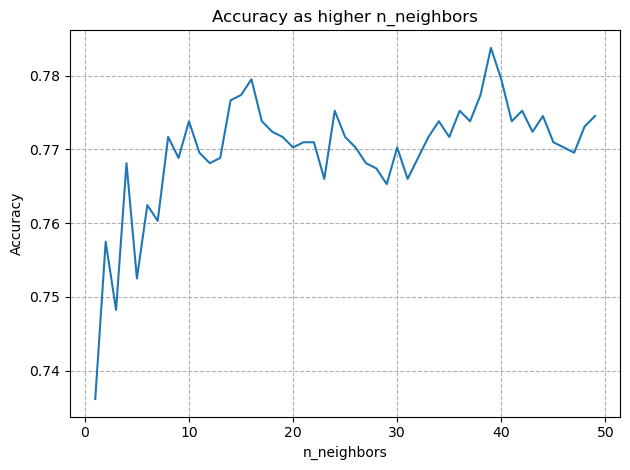

maximum accuracy at n_neighbors:39 with accuracy=0.7837837837837838


In [58]:
iterations = list(range(1,50))
test_acc = []
for n in iterations:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train) 
    y_test_pred_KNN = model.predict(x_test) 
    output = pd.DataFrame({cus_id: cus_id_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_KNN})
    test_acc.append( accuracy_score(y_test, y_test_pred_KNN) ) 

plt.plot(iterations, test_acc)
plt.title('Accuracy as higher n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

d = dict(zip(test_acc,iterations))
print(f"maximum accuracy at n_neighbors:{d[max(d.keys())]} with accuracy={max(d.keys())}") 

In [59]:
import numpy as np
def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value

In [60]:
benchmark_value = 0

y_test_pred_Benchmark_0 = get_benchmark_predictions(x_test, benchmark_value)
test_acc = accuracy_score(y_test, y_test_pred_Benchmark_0)
print("Accuracy = ", test_acc)

Accuracy =  0.7339971550497866


<h2> Summary of the results </h2>
<b>Decision Tree</b>
maximum accuracy at max dept:6 with accuracy=0.7802275960170697

<b>Random Forest</b>
maximum accuracy at <b>n_estimators:24, 9 max dept with accuracy=0.8001422475106685</b>

<b>KNN</b>
maximum accuracy at n_neighbors:39 with accuracy=0.7837837837837838

<b>We choose to use Random Forest with 24 estimators and max dept of 9</b>

<h2>Build the model for deplopyment</h2>
Now we build the model on all dataset and save for deployment


In [61]:
from sklearn.model_selection import train_test_split

test_size = round(df.index.size * 0.2)
train, test = train_test_split(df, test_size=test_size, random_state=42, shuffle=True)

label = 'churn'
cus_id = 'customerid'

x_train = train.drop(label, axis=1)
x_train = x_train.drop(cus_id, axis=1)
y_train = train[label]
cus_id_train = train[cus_id]

x_test = test.drop(label, axis=1)
x_test = x_test.drop(cus_id, axis=1)
y_test = test[label]
cus_id_test = test[cus_id]

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = original_df

print(customers.shape)
customers.head(5)

(7043, 21)


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [63]:
def create_dummies(data_frame, column_name):
    return pd.get_dummies(data_frame, columns=[column_name], prefix=column_name, drop_first=True,dtype=int)

def prep(df_features):
    # basic preperations of the data
    df_features = df_features.rename(columns=str.lower)
    
    # הפכיה לערכים מספריים על מנת להציג את הנתונים
    df_features['totalcharges'] = df_features['totalcharges'].str.strip() 
    df_features['totalcharges'] = pd.to_numeric(df_features['totalcharges'], errors='coerce')
   
    df_features = df_features.dropna(subset=['totalcharges'])

    df_features['charge_diff'] = df_features['totalcharges'] - (df_features['monthlycharges']*df_features['tenure'])
    # if the number is negative we assume the price raised during the tenure
    # if the number is 0 there was no change in price during the tenure
    # if the number is positive we assume the price dropped during the tenure
    df_features['price_remain'] = (df_features['charge_diff'] == 0).astype(int)
    df_features['price_raised'] = (df_features['charge_diff'] < 0).astype(int)
    df_features['price_dropped'] = (df_features['charge_diff'] > 0).astype(int)
      
    df_features.loc[df_features.churn == 'No','churn'] =0
    df_features.loc[df_features.churn == 'Yes','churn'] =1
    df_features['churn'] = df_features['churn'].astype(int)
    
    df_features.loc[df_features.gender == 'Male','gender']=0
    df_features.loc[df_features.gender == 'Female','gender']=1
    df_features['gender'] = df_features['gender'].astype(int)
    
    df_features.loc[df_features.partner == 'No','partner']=0
    df_features.loc[df_features.partner == 'Yes','partner']=1
    df_features['partner'] = df_features['partner'].astype(int)
    
    df_features.loc[df_features.dependents == 'No','dependents']=0
    df_features.loc[df_features.dependents == 'Yes','dependents']=1
    df_features['dependents'] = df_features['dependents'].astype(int)
    
    df_features.loc[df_features.phoneservice == 'No','phoneservice'] =0
    df_features.loc[df_features.phoneservice == 'Yes','phoneservice'] =1
    df_features['phoneservice'] = df_features['phoneservice'].astype(int)
    
    df_features.loc[df_features.paperlessbilling == 'No','paperlessbilling'] = 0
    df_features.loc[df_features.paperlessbilling == 'Yes','paperlessbilling'] =1
    df_features['paperlessbilling'] = df_features['paperlessbilling'].astype(int)
    
    df_features = create_dummies(df_features, 'contract')
    df_features = create_dummies(df_features, 'multiplelines')
    df_features = create_dummies(df_features, 'internetservice')
    df_features = create_dummies(df_features, 'onlinesecurity')
    df_features = create_dummies(df_features, 'onlinebackup')
    df_features = create_dummies(df_features, 'deviceprotection')
    df_features = create_dummies(df_features, 'techsupport')
    df_features = create_dummies(df_features, 'streamingtv')
    df_features = create_dummies(df_features, 'streamingmovies')
    df_features = create_dummies(df_features, 'paymentmethod')

    df_features['combined'] = df_features['internetservice_Fiber optic'] | df_features['internetservice_No'] | \
           df_features['onlinesecurity_No internet service'] | df_features['onlinesecurity_Yes'] | \
           df_features['onlinebackup_No internet service'] | df_features['onlinebackup_Yes'] | \
           df_features['deviceprotection_No internet service'] | df_features['deviceprotection_Yes'] | \
           df_features['techsupport_No internet service'] | df_features['techsupport_Yes'] | \
           df_features['streamingtv_No internet service'] | df_features['streamingtv_Yes'] | \
           df_features['streamingmovies_No internet service'] | df_features['streamingmovies_Yes']
    
    sum_all_combined = df_features['internetservice_Fiber optic'] + df_features['internetservice_No'] + \
           df_features['onlinesecurity_No internet service'] + df_features['onlinesecurity_Yes'] + \
           df_features['onlinebackup_No internet service'] + df_features['onlinebackup_Yes'] + \
           df_features['deviceprotection_No internet service'] + df_features['deviceprotection_Yes'] + \
           df_features['techsupport_No internet service'] + df_features['techsupport_Yes'] + \
           df_features['streamingtv_No internet service'] + df_features['streamingtv_Yes'] + \
           df_features['streamingmovies_No internet service'] + df_features['streamingmovies_Yes']
    df_features['combined_majority'] = (sum_all_combined > 6).astype(int)
    
    df_features.drop(['internetservice_Fiber optic', 'internetservice_No','onlinesecurity_No internet service','onlinesecurity_Yes'], axis=1, inplace=True)
    df_features.drop(['onlinebackup_No internet service','onlinebackup_Yes','deviceprotection_No internet service', 'deviceprotection_Yes'], axis=1, inplace=True)
    df_features.drop(['techsupport_No internet service', 'techsupport_Yes','streamingtv_No internet service', 'streamingtv_Yes'], axis=1, inplace=True)
    df_features.drop(['streamingmovies_No internet service', 'streamingmovies_Yes'], axis=1, inplace=True)
    
    customer_id = df_features['customerid']

    y = df_features['churn'] # Save the target variable

    # Let's drop the PassengerId column and Survived column from the features
    X = df_features.drop(columns=['customerid', 'churn'])

    X = X.reindex(sorted(X.columns), axis=1)
    
    # Let's convert all data to float because some modules warn against other types
    X = X.astype(float)
    y = y.astype(float)

    return X, y, customer_id

In [64]:
X, y, customer_id = prep(customers)

display(X)
display(y)
display(customer_id)

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
0        1.0            0.0      1.0         0.0     1.0           0.0   
1        0.0            0.0      0.0         0.0    34.0           1.0   
2        0.0            0.0      0.0         0.0     2.0           1.0   
3        0.0            0.0      0.0         0.0    45.0           0.0   
4        1.0            0.0      0.0         0.0     2.0           1.0   
...      ...            ...      ...         ...     ...           ...   
7038     0.0            0.0      1.0         1.0    24.0           1.0   
7039     1.0            0.0      1.0         1.0    72.0           1.0   
7040     1.0            0.0      1.0         1.0    11.0           0.0   
7041     0.0            1.0      1.0         0.0     4.0           1.0   
7042     0.0            0.0      0.0         0.0    66.0           1.0   

      paperlessbilling  monthlycharges  totalcharges  charge_diff  ...  \
0                  1.0           29.85         29.85         0.00  ...   
1                  0.0           56.95       1889.50       -46.80  ...   
2                  1.0           53.85        108.15         0.45  ...   
3                  0.0           42.30       1840.75       -62.75  ...   
4                  1.0           70.70        151.65        10.25  ...   
...                ...             ...           ...          ...  ...   
7038               1.0           84.80       1990.50       -44.70  ...   
7039               1.0          103.20       7362.90       -67.50  ...   
7040               1.0           29.60        346.45        20.85  ...   
7041               1.0           74.40        306.60         9.00  ...   
7042               1.0          105.65       6844.50      -128.40  ...   

      price_dropped  contract_One year  contract_Two year  \
0               0.0                0.0                0.0   
1               0.0                1.0                0.0   
2               1.0                0.0                0.0   
3               0.0                1.0                0.0   
4               1.0                0.0                0.0   
...             ...                ...                ...   
7038            0.0                1.0                0.0   
7039            0.0                1.0                0.0   
7040            1.0                0.0                0.0   
7041            1.0                0.0                0.0   
7042            0.0                0.0                1.0   

      multiplelines_No phone service  multiplelines_Yes  \
0                                1.0                0.0   
1                                0.0                0.0   
2                                0.0                0.0   
3                                1.0                0.0   
4                                0.0                0.0   
...                              ...                ...   
7038                             0.0                1.0   
7039                             0.0                1.0   
7040                             1.0                0.0   
7041                             0.0                1.0   
7042                             0.0                0.0   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
0                                       0.0                             1.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             1.0   
...                                     ...                             ...   
7038                                    0.0                             0.0   
7039                                    1.0                             0.0   
7040                                    0.0                             1.0

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: churn, Length: 7032, dtype: float64

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerid, Length: 7032, dtype: object

In [65]:
# No missing values!
X.isna().sum()

gender                                   0
seniorcitizen                            0
partner                                  0
dependents                               0
tenure                                   0
phoneservice                             0
paperlessbilling                         0
monthlycharges                           0
totalcharges                             0
charge_diff                              0
price_remain                             0
price_raised                             0
price_dropped                            0
contract_One year                        0
contract_Two year                        0
multiplelines_No phone service           0
multiplelines_Yes                        0
paymentmethod_Credit card (automatic)    0
paymentmethod_Electronic check           0
paymentmethod_Mailed check               0
combined                                 0
combined_majority                        0
dtype: int64

In [66]:
# Check all values are indeed numeric (float)
X.dtypes

gender                                   float64
seniorcitizen                            float64
partner                                  float64
dependents                               float64
tenure                                   float64
phoneservice                             float64
paperlessbilling                         float64
monthlycharges                           float64
totalcharges                             float64
charge_diff                              float64
price_remain                             float64
price_raised                             float64
price_dropped                            float64
contract_One year                        float64
contract_Two year                        float64
multiplelines_No phone service           float64
multiplelines_Yes                        float64
paymentmethod_Credit card (automatic)    float64
paymentmethod_Electronic check           float64
paymentmethod_Mailed check               float64
combined            

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=24, max_depth=9, random_state=1))
])

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=0, shuffle=True)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)

Final Model Accuracy: 0.8


In [69]:
# Train the pipeline on the entire dataset (train + test) for deployment
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=9, n_estimators=24,
                                        random_state=1))])

In [70]:
import joblib

# Save the pipeline using joblib
filename = "customer_final_pipeline.pkl"
joblib.dump(pipeline, filename)

print(f"Pipeline saved as {filename}")

Pipeline saved as customer_final_pipeline.pkl


In [71]:
X.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'charge_diff', 'price_remain', 'price_raised', 'price_dropped',
       'contract_One year', 'contract_Two year',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'combined', 'combined_majority'],
      dtype='object')